# Reading in the data

In [39]:
# Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import layers

In [40]:
tf.random.set_seed(42)

In [2]:
#load in and process images
def load_image(path):
    images = Image.open(f'./../CUB_200_2011/images/{path}') 
    new_image=images.resize((128,128))
    color_image=new_image.convert("RGB")
    arrays1 = np.asarray(color_image)
    floaters= arrays1.astype('float32')
    floaters2=floaters/255.0
    return floaters2

In [3]:
# Main Directory Files

images= pd.read_csv("./../CUB_200_2011/images.txt", sep=" ", header=None, names=['image_id','image_name'])
train_test_list= pd.read_csv("./../CUB_200_2011/train_test_split.txt", sep=" ", header=None, names=['image_id','is_training_image'])
classes= pd.read_csv("./../CUB_200_2011/classes.txt", sep=" ", header=None, names=['class_id', 'class_name'])
image_class_labels= pd.read_csv("./../CUB_200_2011/image_class_labels.txt", sep=" ", header=None, names=['image_id', 'class_id'])
bounding_boxes= pd.read_csv("./../CUB_200_2011/bounding_boxes.txt", sep=" ", header=None, names=['image_id','x','y','width','height'])

In [4]:
# Parts Directory Files 

parts= pd.read_csv("./../CUB_200_2011/parts/parts_edited.txt", sep=" ", header=None, names=['part_id','part_name'])
# Part Locs Note: <x> and <y> denote the pixel location of the center of the part.
part_locs= pd.read_csv("./../CUB_200_2011/parts/part_locs.txt", sep=" ", header=None, names=['image_id', 'part_id', 'x','y','visible'])
part_click_locs= pd.read_csv("./../CUB_200_2011/parts/part_click_locs.txt", sep=" ", header=None, names=['image_id', 'part_id', 'x','y','visible','time'])

In [5]:
# Attributes Directory Files 

attributes= pd.read_csv("./../CUB_200_2011/attributes/attributes.txt", sep=" ", header=None, names=['attribute_id','attribute_name'])
certainties= pd.read_csv("./../CUB_200_2011/attributes/certainties.txt", sep=" ", header=None, names=['certainty_id','certainty_name'])
image_attribute_labels= pd.read_csv("./../CUB_200_2011/attributes/image_attribute_labels.txt", sep=" ", header=None, names=['image_id','attribute_id','is_present','certainty_id','time'])
class_attribute_labels_continuous= pd.read_csv("./../CUB_200_2011/attributes/class_attribute_labels_continuous.txt", sep=" ", header=None)
# each line corresponds to one class (in the same order as classes)

In [6]:
# Create source of truth for images, classes
merged1=pd.merge(images, train_test_list, on='image_id', how='left')
merged2=pd.merge(merged1, image_class_labels, on='image_id', how='left')
class_map_dir=pd.merge(merged2, classes, on='class_id', how='left')
class_map_dir.head()

,image_id,image_name,is_training_image,class_id,class_name
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1,001.Black_footed_Albatross
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1,001.Black_footed_Albatross
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross


In [7]:
list_of_images=[load_image(i) for i in class_map_dir['image_name']]
array_of_img=np.asarray(list_of_images)

In [8]:
list_of_labels=class_map_dir['class_id']

In [9]:
# sanity check length of both
print(len(list_of_images))
print(len(list_of_labels))

11788
11788


In [10]:
X_train, X_test, y_train, y_test = train_test_split(array_of_img, list_of_labels, train_size=0.70, random_state=42)
X_train.dtype

dtype('float32')

In [11]:
# Augmentation

In [18]:
y_train[1]

1

In [13]:
X_train[1]

array([[[0.09411765, 0.14117648, 0.05882353],
        [0.12156863, 0.16862746, 0.07450981],
        [0.07843138, 0.16078432, 0.02352941],
        ...,
        [0.01568628, 0.00784314, 0.03137255],
        [0.01568628, 0.00392157, 0.03529412],
        [0.02352941, 0.01176471, 0.03921569]],

       [[0.13333334, 0.15686275, 0.10980392],
        [0.14509805, 0.16470589, 0.11372549],
        [0.10588235, 0.14901961, 0.05098039],
        ...,
        [0.01568628, 0.00392157, 0.02745098],
        [0.01568628, 0.00392157, 0.02745098],
        [0.01960784, 0.00784314, 0.03137255]],

       [[0.14901961, 0.15686275, 0.10588235],
        [0.12941177, 0.14117648, 0.09019608],
        [0.09803922, 0.1254902 , 0.05098039],
        ...,
        [0.01176471, 0.00392157, 0.02352941],
        [0.01176471, 0.00392157, 0.02352941],
        [0.01176471, 0.00392157, 0.02352941]],

       ...,

       [[0.42745098, 0.38431373, 0.3254902 ],
        [0.37254903, 0.3372549 , 0.29803923],
        [0.3529412 , 0

In [14]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [23]:
image = X_train[5]

In [25]:
image = tf.expand_dims(X_train[5], 0)

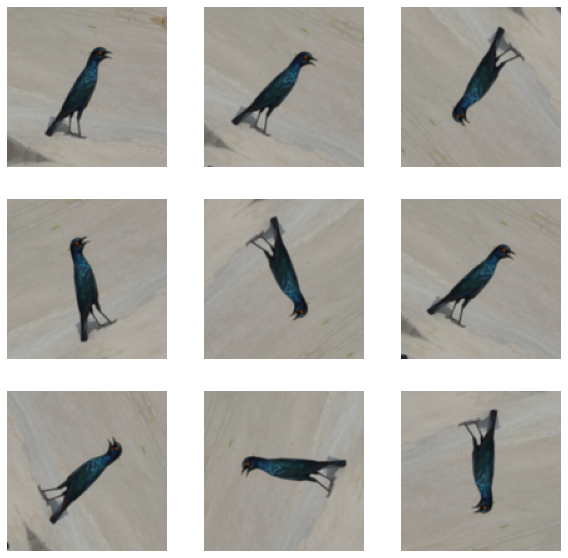

In [26]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [27]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)
y_train = utils.to_categorical(y_train,201)
y_test = utils.to_categorical(y_test,201)

In [28]:
model = Sequential(tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
]))
model.add(Flatten(input_shape = (128, 128, 3)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))

model.add(Dense(201, activation = 'softmax'))
# Compile model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    verbose=1)


Epoch 1/10
33/33 [==============================] - 9s 257ms/step - loss: 13.0884 - accuracy: 0.0053 - val_loss: 5.3305 - val_accuracy: 0.0042
Epoch 2/10
33/33 [==============================] - 8s 257ms/step - loss: 5.3081 - accuracy: 0.0044 - val_loss: 5.3037 - val_accuracy: 0.0045
Epoch 3/10
33/33 [==============================] - 9s 263ms/step - loss: 5.3026 - accuracy: 0.0048 - val_loss: 5.3039 - val_accuracy: 0.0034
Epoch 4/10
33/33 [==============================] - 10s 295ms/step - loss: 5.3022 - accuracy: 0.0047 - val_loss: 5.3041 - val_accuracy: 0.0025
Epoch 5/10
33/33 [==============================] - 10s 294ms/step - loss: 5.3018 - accuracy: 0.0047 - val_loss: 5.3044 - val_accuracy: 0.0025
Epoch 6/10
33/33 [==============================] - 10s 294ms/step - loss: 5.3015 - accuracy: 0.0062 - val_loss: 5.3046 - val_accuracy: 0.0025
Epoch 7/10
33/33 [==============================] - 10s 299ms/step - loss: 5.3011 - accuracy: 0.0062 - val_loss: 5.3049 - val_accuracy: 0.0025
E

In [ ]:
#try it using their recommended train/test split

In [29]:
class_map_dir_train=class_map_dir.loc[class_map_dir['is_training_image']==1]
list_of_images_train=[load_image(i) for i in class_map_dir_train['image_name']]
array_of_img_train=np.asarray(list_of_images_train)
list_of_labels_train=class_map_dir_train['class_id']

In [30]:
class_map_dir_test=class_map_dir.loc[class_map_dir['is_training_image']==0]
list_of_images_test=[load_image(i) for i in class_map_dir_test['image_name']]
array_of_img_test=np.asarray(list_of_images_test)
list_of_labels_test=class_map_dir_test['class_id']

In [31]:
# sanity check length of both
print(len(list_of_images_train))
print(len(list_of_labels_train))

5994
5994


In [32]:
# sanity check length of both
print(len(list_of_images_test))
print(len(list_of_labels_test))

5794
5794


In [34]:
X_train_alt=array_of_img_train
y_train_alt=list_of_labels_train

X_test_alt=array_of_img_test
y_test_alt=list_of_labels_test

X_train_alt = X_train_alt.reshape(X_train_alt.shape[0], 128, 128, 3)
X_test_alt = X_test_alt.reshape(X_test_alt.shape[0], 128, 128, 3)
y_train_alt = utils.to_categorical(y_train_alt,201)
y_test_alt = utils.to_categorical(y_test_alt,201)


In [36]:
model_alt = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt.add(Flatten(input_shape = (128, 128, 3)))
model_alt.add(Dense(512, activation = 'relu'))
model_alt.add(Dense(512, activation = 'relu'))
model_alt.add(Dense(256, activation = 'relu'))

model_alt.add(Dense(201, activation = 'softmax'))
# Compile model.
model_alt.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt  = model_alt.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 16s 659ms/step - loss: 17.1862 - accuracy: 0.0035 - val_loss: 5.7532 - val_accuracy: 0.0055
Epoch 2/50
24/24 [==============================] - 16s 670ms/step - loss: 5.3732 - accuracy: 0.0047 - val_loss: 5.3020 - val_accuracy: 0.0052
Epoch 3/50
24/24 [==============================] - 17s 717ms/step - loss: 5.3040 - accuracy: 0.0038 - val_loss: 5.3025 - val_accuracy: 0.0047
Epoch 4/50
24/24 [==============================] - 16s 690ms/step - loss: 5.3036 - accuracy: 0.0037 - val_loss: 5.3026 - val_accuracy: 0.0052
Epoch 5/50
24/24 [==============================] - 16s 673ms/step - loss: 5.3023 - accuracy: 0.0052 - val_loss: 5.3025 - val_accuracy: 0.0054
Epoch 6/50
24/24 [==============================] - 16s 656ms/step - loss: 5.3025 - accuracy: 0.0042 - val_loss: 5.3016 - val_accuracy: 0.0069
Epoch 7/50
24/24 [==============================] - 16s 663ms/step - loss: 5.3013 - accuracy: 0.0025 - val_loss: 5.3028 - val_accuracy: 0.005

In [41]:
model_alt.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_2 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               25166336  
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                      

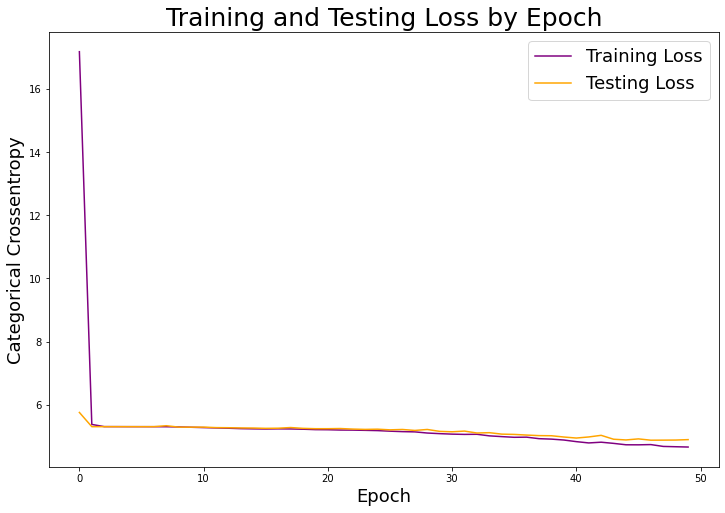

In [38]:
# Check out our train loss and test loss over epochs.
train_loss = history_alt.history['loss']
test_loss = history_alt.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='purple')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [43]:
model_alt2 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt2.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt2.add(Flatten(input_shape = (128, 128, 3)))
model_alt2.add(Dense(512, activation = 'relu'))
model_alt2.add(Dense(512, activation = 'relu'))
model_alt2.add(Dense(256, activation = 'relu'))

model_alt2.add(Dense(201, activation = 'softmax'))
# Compile model.
model_alt2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt2  = model_alt2.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 36s 1s/step - loss: 9.3606 - accuracy: 0.0043 - val_loss: 5.3659 - val_accuracy: 0.0047
Epoch 2/50
24/24 [==============================] - 38s 2s/step - loss: 5.3131 - accuracy: 0.0040 - val_loss: 5.3035 - val_accuracy: 0.0060
Epoch 3/50
24/24 [==============================] - 41s 2s/step - loss: 5.3014 - accuracy: 0.0048 - val_loss: 5.2997 - val_accuracy: 0.0057
Epoch 4/50
24/24 [==============================] - 45s 2s/step - loss: 5.2972 - accuracy: 0.0067 - val_loss: 5.2943 - val_accuracy: 0.0079
Epoch 5/50
24/24 [==============================] - 53s 2s/step - loss: 5.2871 - accuracy: 0.0090 - val_loss: 5.2718 - val_accuracy: 0.0107
Epoch 6/50
24/24 [==============================] - 52s 2s/step - loss: 5.2398 - accuracy: 0.0100 - val_loss: 5.2129 - val_accuracy: 0.0112
Epoch 7/50
24/24 [==============================] - 52s 2s/step - loss: 5.1820 - accuracy: 0.0122 - val_loss: 5.1581 - val_accuracy: 0.0154
Epoch 8/50
24/24 [==

In [44]:
model_alt3 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt3.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt3.add(MaxPooling2D(pool_size = (2, 2))) # dimensions of region of pooling

model_alt3.add(Flatten(input_shape = (128, 128, 3)))
model_alt3.add(Dense(512, activation = 'relu'))
model_alt3.add(Dense(512, activation = 'relu'))
model_alt3.add(Dense(256, activation = 'relu'))

model_alt3.add(Dense(201, activation = 'softmax'))
# Compile model.
model_alt3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt3  = model_alt3.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 32s 1s/step - loss: 5.8836 - accuracy: 0.0062 - val_loss: 5.3188 - val_accuracy: 0.0052
Epoch 2/50
24/24 [==============================] - 36s 1s/step - loss: 5.3115 - accuracy: 0.0043 - val_loss: 5.3064 - val_accuracy: 0.0057
Epoch 3/50
24/24 [==============================] - 40s 2s/step - loss: 5.3038 - accuracy: 0.0035 - val_loss: 5.3030 - val_accuracy: 0.0069
Epoch 4/50
24/24 [==============================] - 42s 2s/step - loss: 5.3029 - accuracy: 0.0058 - val_loss: 5.3023 - val_accuracy: 0.0055
Epoch 5/50
24/24 [==============================] - 39s 2s/step - loss: 5.3017 - accuracy: 0.0057 - val_loss: 5.3006 - val_accuracy: 0.0041
Epoch 6/50
24/24 [==============================] - 40s 2s/step - loss: 5.2990 - accuracy: 0.0063 - val_loss: 5.3003 - val_accuracy: 0.0097
Epoch 7/50
24/24 [==============================] - 42s 2s/step - loss: 5.2897 - accuracy: 0.0068 - val_loss: 5.2825 - val_accuracy: 0.0064
Epoch 8/50
24/24 [==

In [45]:
model_alt4 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt4.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt4.add(MaxPooling2D(pool_size = (2, 2))) # dimensions of region of pooling
model_alt4.add(Conv2D(16,
                     kernel_size = (3, 3),
                     activation = 'relu'))
model_alt4.add(MaxPooling2D(pool_size=(2, 2)))
model_alt4.add(Flatten(input_shape = (128, 128, 3)))
model_alt4.add(Dense(512, activation = 'relu'))
model_alt4.add(Dense(512, activation = 'relu'))
model_alt4.add(Dense(256, activation = 'relu'))

model_alt4.add(Dense(201, activation = 'softmax'))
# Compile model.
model_alt4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_alt4  = model_alt4.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 48s 2s/step - loss: 5.3183 - accuracy: 0.0047 - val_loss: 5.2947 - val_accuracy: 0.0076
Epoch 2/50
24/24 [==============================] - 44s 2s/step - loss: 5.2536 - accuracy: 0.0085 - val_loss: 5.2294 - val_accuracy: 0.0072
Epoch 3/50
24/24 [==============================] - 44s 2s/step - loss: 5.1488 - accuracy: 0.0113 - val_loss: 5.0938 - val_accuracy: 0.0112
Epoch 4/50
24/24 [==============================] - 45s 2s/step - loss: 5.0208 - accuracy: 0.0138 - val_loss: 4.9417 - val_accuracy: 0.0183
Epoch 5/50
24/24 [==============================] - 45s 2s/step - loss: 4.8917 - accuracy: 0.0200 - val_loss: 4.8708 - val_accuracy: 0.0192
Epoch 6/50
24/24 [==============================] - 44s 2s/step - loss: 4.8037 - accuracy: 0.0219 - val_loss: 4.7896 - val_accuracy: 0.0243
Epoch 7/50
24/24 [==============================] - 44s 2s/step - loss: 4.7131 - accuracy: 0.0309 - val_loss: 4.7429 - val_accuracy: 0.0250
Epoch 8/50
24/24 [==

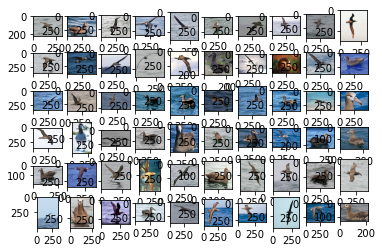

In [94]:

src = './../CUB_200_2011/images/001.Black_footed_Albatross/' # Images source

files = os.listdir(src) # Getting the files to copy

for idx, image_src in enumerate(files):
    
    image = Image.open(f'{src}{image_src}')  
    plt.subplot(6, 10, idx+1), plt.imshow(image) #6 x 10 because there are 60 images

plt.show()


In [181]:


src = './../CUB_200_2011/images/001.Black_footed_Albatross/' # Images source

files = os.listdir(src) # Getting the files to copy
arrays_empty=[]
for idx, image_src in enumerate(files):
    images = Image.open(f'{src}{image_src}')  
    arrays1 = np.asarray(images)
    arrays_empty.append(arrays1)
arrays_empty[59]

array([[[155, 156, 161],
        [153, 154, 159],
        [151, 152, 157],
        ...,
        [140, 139, 145],
        [137, 136, 142],
        [135, 134, 140]],

       [[139, 140, 145],
        [139, 140, 145],
        [139, 140, 145],
        ...,
        [143, 142, 148],
        [143, 142, 148],
        [143, 142, 148]],

       [[138, 139, 144],
        [137, 138, 143],
        [136, 137, 142],
        ...,
        [152, 151, 157],
        [154, 153, 159],
        [154, 153, 159]],

       ...,

       [[142, 145, 152],
        [120, 123, 130],
        [100, 103, 110],
        ...,
        [128, 129, 134],
        [114, 115, 120],
        [ 79,  80,  85]],

       [[ 98, 103, 109],
        [ 94,  99, 105],
        [107, 112, 118],
        ...,
        [ 87,  88,  93],
        [ 78,  79,  84],
        [ 91,  92,  97]],

       [[ 99, 104, 110],
        [ 93,  98, 104],
        [ 96, 101, 107],
        ...,
        [142, 143, 148],
        [161, 162, 167],
        [148, 149, 154]]

In [183]:

# <class 'numpy.ndarray'>
print(type(arrays_empty))
print(type(arrays_empty[0]))
#  shape
print(arrays_empty[1].shape)


<class 'list'>
<class 'numpy.ndarray'>
(347, 500, 3)


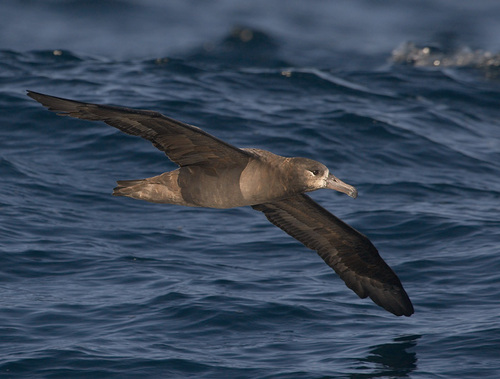

In [104]:
image_test = Image.fromarray(arrays_empty[25])
image_test

In [157]:
npa = np.asarray([arrays_empty])
npa.dtype

dtype('O')

In [159]:
arrays_empty[1].dtype

dtype('uint8')

In [139]:
# try a dummy group
X_train=arrays_empty[:45]
X_test=arrays_empty[45:61]
y_train=[1]*45
y_test=[0]*15

In [140]:
len(X_train)

45

In [141]:
len(y_train)

45

In [142]:
len(X_test)

15

In [143]:
len(y_test)

15

In [145]:
data=(X_train, y_train), (X_test, y_test)

In [151]:
arrays_empty.dtype

AttributeError: 'list' object has no attribute 'dtype'

In [175]:
arrays_empty[1].shape

(347, 500, 3)

In [184]:
new_arrays=[]
for i in arrays_empty:
    floaters= i.astype('float32')
    floaters2=floaters/255.0
    #print(i.dtype) these are uint8
    new_arrays.append(floaters2)
    print(i.shape)
new_arrays


(223, 320, 3)
(347, 500, 3)
(375, 500, 3)
(335, 500, 3)
(350, 350, 3)
(301, 500, 3)
(357, 500, 3)
(336, 500, 3)
(416, 500, 3)
(380, 331, 3)
(357, 500, 3)
(392, 500, 3)
(338, 500, 3)
(350, 350, 3)
(414, 500, 3)
(208, 250, 3)
(332, 500, 3)
(340, 500, 3)
(383, 500, 3)
(375, 500, 3)
(333, 500, 3)
(375, 500, 3)
(272, 448, 3)
(332, 500, 3)
(500, 500, 3)
(379, 500, 3)
(500, 500, 3)
(356, 500, 3)
(332, 500, 3)
(335, 500, 3)
(360, 500, 3)
(500, 307, 3)
(275, 500, 3)
(391, 500, 3)
(450, 455, 3)
(390, 500, 3)
(337, 500, 3)
(334, 500, 3)
(240, 320, 3)
(187, 240, 3)
(192, 288, 3)
(333, 400, 3)
(350, 350, 3)
(500, 333, 3)
(385, 500, 3)
(200, 200, 3)
(500, 389, 3)
(500, 415, 3)
(441, 500, 3)
(500, 450, 3)
(500, 346, 3)
(359, 260, 3)
(322, 376, 3)
(320, 500, 3)
(375, 500, 3)
(470, 500, 3)
(280, 420, 3)
(400, 335, 3)
(334, 500, 3)
(136, 216, 3)


[array([[[0.69803923, 0.7137255 , 0.70980394],
         [0.69411767, 0.70980394, 0.7058824 ],
         [0.69411767, 0.70980394, 0.7058824 ],
         ...,
         [0.6784314 , 0.7019608 , 0.69411767],
         [0.6745098 , 0.69803923, 0.6901961 ],
         [0.6745098 , 0.69803923, 0.6901961 ]],
 
        [[0.6745098 , 0.6901961 , 0.6862745 ],
         [0.6784314 , 0.69411767, 0.6901961 ],
         [0.6784314 , 0.69411767, 0.6901961 ],
         ...,
         [0.69411767, 0.7176471 , 0.70980394],
         [0.69411767, 0.7176471 , 0.70980394],
         [0.6901961 , 0.7137255 , 0.7058824 ]],
 
        [[0.6666667 , 0.68235296, 0.6784314 ],
         [0.67058825, 0.6862745 , 0.68235296],
         [0.6745098 , 0.6901961 , 0.6862745 ],
         ...,
         [0.70980394, 0.73333335, 0.7254902 ],
         [0.70980394, 0.73333335, 0.7254902 ],
         [0.7137255 , 0.7372549 , 0.7294118 ]],
 
        ...,
 
        [[0.6156863 , 0.6392157 , 0.6313726 ],
         [0.6156863 , 0.6392157 , 0.63137

In [162]:
arrays_empty/255.0

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [161]:
for i in arrays_empty:
    i /= 255.0


ValueError: output array is read-only

In [146]:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.

X_train /= 255.0

X_test /= 255.0

AttributeError: 'list' object has no attribute 'astype'

### Experiment with turning images back/forth into arrays 

In [64]:

#Example image import
  
from PIL import Image
image = Image.open("./../CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg")

# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)



JPEG
(320, 223)
RGB


In [32]:
#Example of changing the image into an array

from numpy import asarray
# asarray() class is used to convert PIL images into NumPy arrays
numpydata = asarray(image)
  
# <class 'numpy.ndarray'>
print(type(numpydata))
  
#  shape
print(numpydata.shape)
numpydata

<class 'numpy.ndarray'>
(223, 320, 3)


array([[[178, 182, 181],
        [177, 181, 180],
        [177, 181, 180],
        ...,
        [173, 179, 177],
        [172, 178, 176],
        [172, 178, 176]],

       [[172, 176, 175],
        [173, 177, 176],
        [173, 177, 176],
        ...,
        [177, 183, 181],
        [177, 183, 181],
        [176, 182, 180]],

       [[170, 174, 173],
        [171, 175, 174],
        [172, 176, 175],
        ...,
        [181, 187, 185],
        [181, 187, 185],
        [182, 188, 186]],

       ...,

       [[157, 163, 161],
        [157, 163, 161],
        [157, 163, 161],
        ...,
        [166, 172, 168],
        [166, 172, 168],
        [166, 172, 168]],

       [[161, 167, 165],
        [160, 166, 164],
        [160, 166, 164],
        ...,
        [164, 170, 166],
        [165, 171, 167],
        [166, 172, 168]],

       [[163, 169, 167],
        [162, 168, 166],
        [161, 167, 165],
        ...,
        [159, 168, 163],
        [160, 169, 164],
        [160, 169, 164]]

<class 'PIL.Image.Image'>
RGB
(320, 223)
<PIL.Image.Image image mode=RGB size=320x223 at 0x1ED2E58A460>


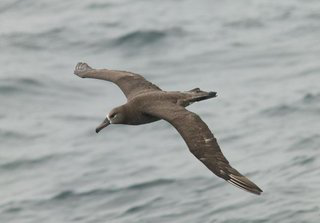

In [4]:
#now get back to the image from our array!

from PIL import Image
pilImage = Image.fromarray(numpydata)
print(type(pilImage))
  
# Let us check  image details
print(pilImage.mode)
print(pilImage.size)
print(pilImage)
pilImage

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.ndarray'>


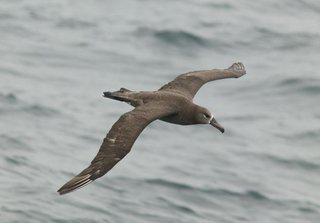

In [10]:
#try flipping the image

example=tf.image.flip_left_right(numpydata)
print(type(example))
#convert the Eager Tensor back into an np array
ex2=np.array(example)
print(type(ex2))
pilImage_flipped = Image.fromarray(ex2)
pilImage_flipped 

<class 'numpy.ndarray'>


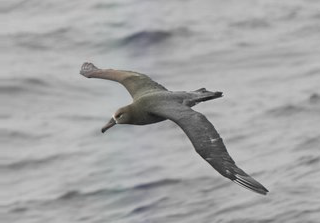

In [30]:
ex_tilt=tf.keras.preprocessing.image.random_rotation(
    x=numpydata, rg=45, row_axis=1, col_axis=2, channel_axis=0, fill_mode='nearest',
    cval=0.0, interpolation_order=1)
print(type(ex_tilt))
pilImage_tilted = Image.fromarray(ex_tilt)
pilImage_tilted

(223, 320, 3)
[[[178 182 181]
  [177 181 180]
  [177 181 180]
  ...
  [173 179 177]
  [172 178 176]
  [172 178 176]]

 [[172 176 175]
  [173 177 176]
  [173 177 176]
  ...
  [177 183 181]
  [177 183 181]
  [176 182 180]]

 [[170 174 173]
  [171 175 174]
  [172 176 175]
  ...
  [181 187 185]
  [181 187 185]
  [182 188 186]]

 ...

 [[157 163 161]
  [157 163 161]
  [157 163 161]
  ...
  [166 172 168]
  [166 172 168]
  [166 172 168]]

 [[161 167 165]
  [160 166 164]
  [160 166 164]
  ...
  [164 170 166]
  [165 171 167]
  [166 172 168]]

 [[163 169 167]
  [162 168 166]
  [161 167 165]
  ...
  [159 168 163]
  [160 169 164]
  [160 169 164]]]


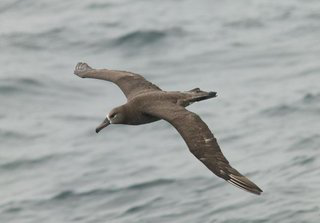

In [110]:
#try this method as an alternative
np_img2 = np.array(image)
  
print(np_img2.shape)
print(np_img2)
pilImage2 = Image.fromarray(np_img2)
pilImage2

In [34]:
import cv2
import glob
import numpy as np

X_data = []
files = glob.glob ("./../CUB_200_2011/images/001.Black_footed_Albatross/*.PNG")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X_data.append (image)

print('X_data shape:', np.array(X_data).shape)

X_data shape: (0,)


In [38]:
files = glob.glob("./../CUB_200_2011/images/*.png")
files

[]

### Load in .txt files from dataset

In [189]:
# Main Directory Files

images= pd.read_csv("./../CUB_200_2011/images.txt", sep=" ", header=None, names=['image_id','image_name'])
train_test_list= pd.read_csv("./../CUB_200_2011/train_test_split.txt", sep=" ", header=None, names=['image_id','is_training_image'])
classes= pd.read_csv("./../CUB_200_2011/classes.txt", sep=" ", header=None, names=['class_id', 'class_name'])
image_class_labels= pd.read_csv("./../CUB_200_2011/image_class_labels.txt", sep=" ", header=None, names=['image_id', 'class_id'])
#bounding boxes in pixels 
bounding_boxes= pd.read_csv("./../CUB_200_2011/bounding_boxes.txt", sep=" ", header=None, names=['image_id','x','y','width','height'])


In [190]:
# Parts Directory Files 

parts= pd.read_csv("./../CUB_200_2011/parts/parts_edited.txt", sep=" ", header=None, names=['part_id','part_name'])
# Part Locs Note: <x> and <y> denote the pixel location of the center of the part.
part_locs= pd.read_csv("./../CUB_200_2011/parts/part_locs.txt", sep=" ", header=None, names=['image_id', 'part_id', 'x','y','visible'])
part_click_locs= pd.read_csv("./../CUB_200_2011/parts/part_click_locs.txt", sep=" ", header=None, names=['image_id', 'part_id', 'x','y','visible','time'])


In [191]:
# Attributes Directory Files 
attributes= pd.read_csv("./../CUB_200_2011/attributes/attributes.txt", sep=" ", header=None, names=['attribute_id','attribute_name'])
certainties= pd.read_csv("./../CUB_200_2011/attributes/certainties.txt", sep=" ", header=None, names=['certainty_id','certainty_name'])
image_attribute_labels= pd.read_csv("./../CUB_200_2011/attributes/image_attribute_labels.txt", sep=" ", header=None, names=['image_id','attribute_id','is_present','certainty_id','time'])
class_attribute_labels_continuous= pd.read_csv("./../CUB_200_2011/attributes/class_attribute_labels_continuous.txt", sep=" ", header=None)
# each line corresponds to one class (in the same order as classes)

### Merge Files for Clarity

In [ ]:
src = './../CUB_200_2011/images/001.Black_footed_Albatross/' # Images source

files = os.listdir(src) # Getting the files to copy
arrays_empty=[]
for idx, image_src in enumerate(files):
    images = Image.open(f'{src}{image_src}')  
    arrays1 = np.asarray(images)
    arrays_empty.append(arrays1)
arrays_empty[59]

In [251]:
def load_image(path):
    images = Image.open(f'./../CUB_200_2011/images/{path}') 
    new_image=images.resize((128,128))
    color_image=new_image.convert("RGB")
    arrays1 = np.asarray(color_image)
    floaters= arrays1.astype('float32')
    floaters2=floaters/255.0
    return floaters2
    

In [252]:
load_image('009.Brewer_Blackbird/Brewer_Blackbird_0028_2682.jpg')

array([[[0.20392157, 0.20392157, 0.20392157],
        [0.20392157, 0.20392157, 0.20392157],
        [0.20392157, 0.20392157, 0.20392157],
        ...,
        [0.47058824, 0.47058824, 0.47058824],
        [0.44705883, 0.44705883, 0.44705883],
        [0.43529412, 0.43529412, 0.43529412]],

       [[0.21176471, 0.21176471, 0.21176471],
        [0.21176471, 0.21176471, 0.21176471],
        [0.20784314, 0.20784314, 0.20784314],
        ...,
        [0.47843137, 0.47843137, 0.47843137],
        [0.4627451 , 0.4627451 , 0.4627451 ],
        [0.44705883, 0.44705883, 0.44705883]],

       [[0.21176471, 0.21176471, 0.21176471],
        [0.21176471, 0.21176471, 0.21176471],
        [0.20784314, 0.20784314, 0.20784314],
        ...,
        [0.49019608, 0.49019608, 0.49019608],
        [0.47843137, 0.47843137, 0.47843137],
        [0.46666667, 0.46666667, 0.46666667]],

       ...,

       [[0.18431373, 0.18431373, 0.18431373],
        [0.2       , 0.2       , 0.2       ],
        [0.21176471, 0

In [192]:
# Merge Main Files

merged1=pd.merge(images, bounding_boxes, on='image_id', how='left')
merged2=pd.merge(merged1, image_class_labels, on='image_id', how='left')
merged3=pd.merge(merged2, train_test_list, on='image_id', how='left')
merged4=pd.merge(merged3, classes, on='class_id', how='left')

merged4.head(100)
list_of_images=[]
list_of_labels=[]
for row in merged4:
    list_of_labels.append(row['class_id'])
    list_of_images.append(load_image(row['image_name']))
    

TypeError: string indices must be integers

In [207]:
#list_of_images=pd.DataFrame([load_image(i) for i in merged4['image_name']], columns=['Pixels'])


In [225]:
list_of_images.head()

,Pixels
0,"[[[0.015686275, 0.011764706, 0.015686275], [0...."
1,"[[[0.07058824, 0.07058824, 0.07058824], [0.160..."
2,"[[[0.45882353, 0.54901963, 0.6431373], [0.5294..."
3,"[[[0.79607844, 0.79607844, 0.827451], [0.79607..."
4,"[[[0.9490196, 0.95686275, 0.9529412], [0.95686..."


In [253]:
list_of_images=[load_image(i) for i in merged4['image_name']]

In [254]:
array_of_img=np.asarray(list_of_images)

In [255]:
#for i,x in enumerate(list_of_images):
 #   print (i,x.shape)

In [212]:
list_of_labels=merged4['class_id']

In [214]:
len(list_of_images)

11788

In [215]:
len(list_of_labels)

11788

In [261]:
X_train, X_test, y_train, y_test = train_test_split(array_of_img,list_of_labels,train_size=0.70,random_state=42)

In [262]:
X_train.dtype

dtype('float32')

In [263]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

In [264]:
y_train = utils.to_categorical(y_train,201)
y_test = utils.to_categorical(y_test,201)

In [268]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(201)
])

In [269]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [270]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,201] and labels shape [6432]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits
 (defined at C:\Users\jmsqu\anaconda3\lib\site-packages\keras\backend.py:5113)
]] [Op:__inference_train_function_26290]

Errors may have originated from an input operation.
Input Source operations connected to node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits:
In[0] sparse_categorical_crossentropy/Reshape_1 (defined at C:\Users\jmsqu\anaconda3\lib\site-packages\keras\backend.py:5109)	
In[1] sparse_categorical_crossentropy/Reshape (defined at C:\Users\jmsqu\anaconda3\lib\site-packages\keras\backend.py:3561)

Operation defined at: (most recent call last)
>>>   File "C:\Users\jmsqu\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
>>>     self.ctx_run(self.run)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-270-1e51fab1ab6e>", line 1, in <module>
>>>     model.fit(X_train, y_train, epochs=10)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\engine\training.py", line 809, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\losses.py", line 1737, in sparse_categorical_crossentropy
>>>     return backend.sparse_categorical_crossentropy(
>>> 
>>>   File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\backend.py", line 5113, in sparse_categorical_crossentropy
>>>     res = tf.nn.sparse_softmax_cross_entropy_with_logits(
>>> 

In [275]:
model = Sequential()
model.add(Flatten(input_shape = (128, 128, 3)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))

model.add(Dense(201, activation = 'softmax'))
# Compile model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    verbose=1)


Epoch 1/10
33/33 [==============================] - 10s 292ms/step - loss: 11.0274 - accuracy: 0.0045 - val_loss: 5.3161 - val_accuracy: 0.0054
Epoch 2/10
33/33 [==============================] - 9s 283ms/step - loss: 5.3051 - accuracy: 0.0045 - val_loss: 5.3020 - val_accuracy: 0.0062
Epoch 3/10
33/33 [==============================] - 9s 281ms/step - loss: 5.3011 - accuracy: 0.0044 - val_loss: 5.3030 - val_accuracy: 0.0048
Epoch 4/10
33/33 [==============================] - 10s 303ms/step - loss: 5.3016 - accuracy: 0.0055 - val_loss: 5.3004 - val_accuracy: 0.0040
Epoch 5/10
33/33 [==============================] - 12s 366ms/step - loss: 5.2968 - accuracy: 0.0084 - val_loss: 5.3014 - val_accuracy: 0.0045
Epoch 6/10
33/33 [==============================] - 12s 355ms/step - loss: 5.2966 - accuracy: 0.0052 - val_loss: 5.3020 - val_accuracy: 0.0031
Epoch 7/10
33/33 [==============================] - 13s 385ms/step - loss: 5.2871 - accuracy: 0.0093 - val_loss: 5.3339 - val_accuracy: 0.0048


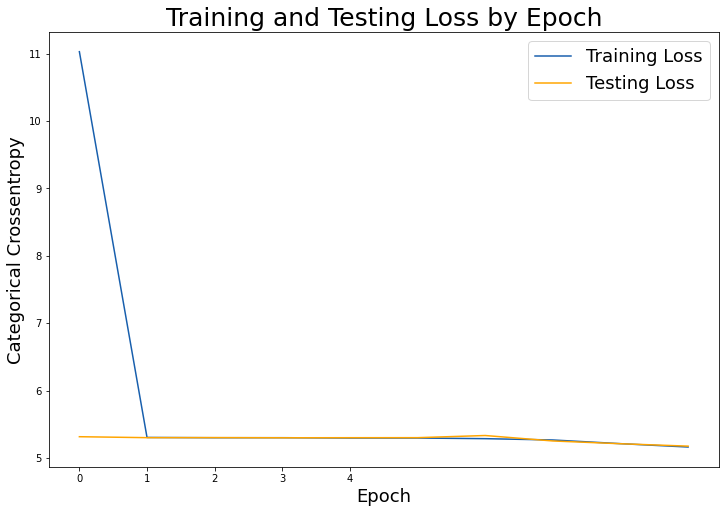

In [276]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(5), np.arange(5))

plt.legend(fontsize = 18);

In [91]:

# Merge Attributes by Image

image_attr=pd.merge(image_attribute_labels, attributes, on='attribute_id', how='left')
image_attr

,image_id,attribute_id,is_present,certainty_id,time,attribute_name
0,1,1,0,3,27.708,has_bill_shape::curved_(up_or_down)
1,1,2,0,3,27.708,has_bill_shape::dagger
2,1,3,0,3,27.708,has_bill_shape::hooked
3,1,4,0,3,27.708,has_bill_shape::needle
4,1,5,1,3,27.708,has_bill_shape::hooked_seabird
...,...,...,...,...,...,...
3677851,11788,308,1,4,4.989,has_crown_color::buff
3677852,11788,309,0,4,8.309,has_wing_pattern::solid
3677853,11788,310,0,4,8.309,has_wing_pattern::spotted
3677854,11788,311,0,4,8.309,has_wing_pattern::striped


In [88]:
attributes

,attribute_id,attribute_name
0,1,has_bill_shape::curved_(up_or_down)
1,2,has_bill_shape::dagger
2,3,has_bill_shape::hooked
3,4,has_bill_shape::needle
4,5,has_bill_shape::hooked_seabird
...,...,...
307,308,has_crown_color::buff
308,309,has_wing_pattern::solid
309,310,has_wing_pattern::spotted
310,311,has_wing_pattern::striped


In [86]:
class_attribute_labels_continuous.shape

(200, 312)

In [87]:
#Attributes by classes

#shows rows (classes) and each column is an attribute (cols), number is the % of time that the human thinks the attribute is present for a given class
class_attribute_labels_continuous

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,311
0,0.000000,2.919708,1.459854,0.000000,59.854015,26.277372,3.649635,5.839416,0.000000,1.639344,...,0.000000,0.000000,21.276596,11.347518,2.12766,31.914894,53.571429,5.357143,21.428571,19.642857
1,4.411765,4.411765,2.941176,1.470588,57.352941,27.205882,0.000000,2.205882,0.000000,0.000000,...,0.000000,2.255639,2.255639,94.736842,0.00000,0.000000,77.142857,3.809524,10.476190,8.571429
2,0.000000,3.973510,3.311258,0.000000,70.860927,14.569536,5.298013,1.986755,0.000000,0.000000,...,2.205882,0.000000,38.970588,2.941176,0.00000,16.176471,71.028037,0.934579,7.476636,20.560748
3,0.000000,1.459854,10.218978,0.000000,0.000000,0.000000,8.759124,25.547445,54.014599,5.839416,...,0.000000,0.000000,88.571429,0.000000,0.00000,2.142857,84.126984,2.380952,3.174603,10.317460
4,0.000000,0.000000,3.225806,0.000000,1.075269,0.000000,0.000000,32.258065,63.440860,0.000000,...,0.000000,0.000000,82.727273,5.454545,0.00000,4.545455,88.461538,0.000000,3.846154,7.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.702703,12.837838,0.000000,0.000000,0.000000,0.000000,76.351351,8.108108,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.973684,0.00000,29.605263,14.379085,22.875817,56.209150,6.535948
196,18.300654,11.764706,0.000000,3.267974,0.000000,0.000000,60.784314,5.882353,0.000000,0.000000,...,0.000000,0.000000,35.443038,4.430380,0.00000,22.784810,16.783217,25.174825,32.167832,25.874126
197,10.759494,36.708861,0.000000,7.594937,0.632911,0.000000,43.670886,0.632911,0.000000,0.000000,...,0.000000,0.000000,14.375000,13.125000,0.00000,41.875000,18.791946,44.295302,18.791946,18.120805
198,0.000000,2.068966,0.000000,2.068966,0.000000,0.000000,88.275862,7.586207,0.000000,0.000000,...,0.000000,1.324503,3.973510,0.000000,0.00000,19.205298,12.413793,34.482759,33.103448,20.000000


In [82]:
#attributes by images
image_attribute_labels

,image_id,attribute_id,is_present,certainty_id,time
0,1,1,0,3,27.708
1,1,2,0,3,27.708
2,1,3,0,3,27.708
3,1,4,0,3,27.708
4,1,5,1,3,27.708
...,...,...,...,...,...
3677851,11788,308,1,4,4.989
3677852,11788,309,0,4,8.309
3677853,11788,310,0,4,8.309
3677854,11788,311,0,4,8.309


In [ ]:
merged4=pd.merge(merged3, classes, on='class_num', how='left')

In [37]:
# Merge Main Files

merged1=pd.merge(images, bounding_boxes, on='record_num', how='left')
merged2=pd.merge(merged1, image_class_labels, on='record_num', how='left')
merged3=pd.merge(merged2, train_test_list, on='record_num', how='left')
merged4=pd.merge(merged3, classes, on='class_num', how='left')

merged4.isnull().sum()

record_num    0
image_name    0
b1            0
b2            0
b3            0
b4            0
class_num     0
test_ind      0
bird_class    0
dtype: int64

In [31]:
bounding_boxes.shape

(11788, 5)

In [22]:
train_test_list.shape

(11788, 2)

In [23]:
classes.shape

(200, 2)

In [24]:
images.shape

(11788, 2)

In [25]:
image_class_labels.shape

(11788, 2)

In [30]:
bounding_boxes.head()

,record_num,b1,b2,b3,b4
0,1,60.0,27.0,325.0,304.0
1,2,139.0,30.0,153.0,264.0
2,3,14.0,112.0,388.0,186.0
3,4,112.0,90.0,255.0,242.0
4,5,70.0,50.0,134.0,303.0


In [27]:
train_test_list['test_ind'].value_counts(normalize=True)

1    0.508483
0    0.491517
Name: test_ind, dtype: float64

In [14]:
classes.head()

,index_num,bird_class
0,1,001.Black_footed_Albatross
1,2,002.Laysan_Albatross
2,3,003.Sooty_Albatross
3,4,004.Groove_billed_Ani
4,5,005.Crested_Auklet


In [26]:


path="./../CUB_200_2011/images"
img_name = sorted(os.listdir("./../CUB_200_2011/images/001.Black_footed_Albatross"))
img_paths = []
for i in img_name:
    img_paths.append(path + i)
img_name

['Black_Footed_Albatross_0001_796111.jpg',
 'Black_Footed_Albatross_0002_55.jpg',
 'Black_Footed_Albatross_0003_796136.jpg',
 'Black_Footed_Albatross_0005_796090.jpg',
 'Black_Footed_Albatross_0006_796065.jpg',
 'Black_Footed_Albatross_0007_796138.jpg',
 'Black_Footed_Albatross_0008_796083.jpg',
 'Black_Footed_Albatross_0009_34.jpg',
 'Black_Footed_Albatross_0010_796097.jpg',
 'Black_Footed_Albatross_0014_89.jpg',
 'Black_Footed_Albatross_0016_796067.jpg',
 'Black_Footed_Albatross_0017_796098.jpg',
 'Black_Footed_Albatross_0019_796104.jpg',
 'Black_Footed_Albatross_0023_796059.jpg',
 'Black_Footed_Albatross_0024_796089.jpg',
 'Black_Footed_Albatross_0025_796057.jpg',
 'Black_Footed_Albatross_0026_796095.jpg',
 'Black_Footed_Albatross_0031_100.jpg',
 'Black_Footed_Albatross_0032_796115.jpg',
 'Black_Footed_Albatross_0033_796086.jpg',
 'Black_Footed_Albatross_0035_796140.jpg',
 'Black_Footed_Albatross_0036_796127.jpg',
 'Black_Footed_Albatross_0037_796120.jpg',
 'Black_Footed_Albatross_0

In [28]:
path="./../CUB_200_2011/images/"
img_folder_list = sorted(os.listdir("./../CUB_200_2011/images/"))
img_folders = []
for i in img_folder_list:
    img_folders.append(path + i)

In [ ]:
# try a more advanced one
path="./../CUB_200_2011/images/"
img_folder_list = sorted(os.listdir("./../CUB_200_2011/images/"))
img_folders = []
for i in img_folder_list:
    img_folders.append(path + i)



In [32]:

img_path = []
for i in img_folders:
    img_path.append(path + i)

In [33]:
img_path

['./../CUB_200_2011/images/./../CUB_200_2011/images/001.Black_footed_Albatross',
 './../CUB_200_2011/images/./../CUB_200_2011/images/002.Laysan_Albatross',
 './../CUB_200_2011/images/./../CUB_200_2011/images/003.Sooty_Albatross',
 './../CUB_200_2011/images/./../CUB_200_2011/images/004.Groove_billed_Ani',
 './../CUB_200_2011/images/./../CUB_200_2011/images/005.Crested_Auklet',
 './../CUB_200_2011/images/./../CUB_200_2011/images/006.Least_Auklet',
 './../CUB_200_2011/images/./../CUB_200_2011/images/007.Parakeet_Auklet',
 './../CUB_200_2011/images/./../CUB_200_2011/images/008.Rhinoceros_Auklet',
 './../CUB_200_2011/images/./../CUB_200_2011/images/009.Brewer_Blackbird',
 './../CUB_200_2011/images/./../CUB_200_2011/images/010.Red_winged_Blackbird',
 './../CUB_200_2011/images/./../CUB_200_2011/images/011.Rusty_Blackbird',
 './../CUB_200_2011/images/./../CUB_200_2011/images/012.Yellow_headed_Blackbird',
 './../CUB_200_2011/images/./../CUB_200_2011/images/013.Bobolink',
 './../CUB_200_2011/ima

In [30]:
img_paths

['./../CUB_200_2011/imagesBlack_Footed_Albatross_0001_796111.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0002_55.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0003_796136.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0005_796090.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0006_796065.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0007_796138.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0008_796083.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0009_34.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0010_796097.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0014_89.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0016_796067.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0017_796098.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0019_796104.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0023_796059.jpg',
 './../CUB_200_2011/imagesBlack_Footed_Albatross_0024_796089.jpg',
 './../

In [13]:
tfds.folder_dataset.ImageFolder(root_dir:"./../CUB_200_2011/images/001.Black_footed_Albatross",
    *,
    shape: Optional[type_utils.Shape] = None,
    dtype: Optional[tf.DType] = None
)

SyntaxError: invalid syntax (<ipython-input-13-acd2d722e564>, line 1)

In [15]:
builder = tfds.ImageFolder("./../CUB_200_2011/images/001.Black_footed_Albatross")
print(builder.info)  # num examples, labels... are automatically calculated
#ds = builder.as_dataset(split='train', shuffle_files=True)
#tfds.show_examples(ds, builder.info) 

tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='./../CUB_200_2011/images/001.Black_footed_Albatross',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=0),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
    },
    citation="""""",
)


In [16]:
builder